In [1]:
library(tidyverse)
library(cowplot)
library(ragg)
library(RcppCNPy)
library(ggside)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp


Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2



In [2]:
data.grad1 = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/grad1.npy')
data.magni = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_mv.npy')
data.yeo7  = read.csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/yeo_net7.csv')[,2]

img.grad = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_gradient_01.png'
img.magni= '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_magnitude_modi.png'
img.nets = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_network.png'

In [3]:
data.nets = factor(data.yeo7, 
                    levels = c(0, 1, 2, 3, 4, 6, 7, 5),
                    labels = c('NA', 'VN', 'SMN', 'DAN', 'VAN', 'FPN', 'DMN', 'LN'))
df.data = data.frame(data.grad1, data.magni, data.nets)
colnames(df.data) = c('Gradient', 'Magnitude', 'Networks')

head(df.data)

,Gradient,Magnitude,Networks
,<dbl>,<dbl>,<fct>
1,6.379188,0.2788877,DMN
2,-4.955848,0.8190907,SMN
3,-2.902429,0.6495430,SMN
4,6.041210,0.1753379,DMN
5,-4.469384,0.9808285,VN
6,5.467233,0.1079935,FPN


In [4]:
cor.test(data.grad1, data.magni, method='spearman' )

Warning message in cor.test.default(data.grad1, data.magni, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  data.grad1 and data.magni
S = 6.2851e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.7982223 


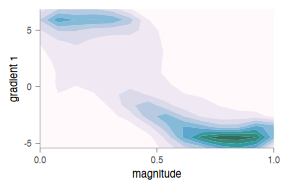

In [102]:
options(repr.plot.width = 60/25.4, repr.plot.height = 40/25.4)
# options(repr.plot.width = 7, repr.plot.height = 6)

f3.point = ggplot(df.data, aes(x=Magnitude, y=Gradient)) +
                # geom_point(alpha=0.1, size=1, color='darkgreen') +
                # geom_smooth(level=0.5) +
                # geom_hex(bins=100) +
                # stat_density_2d(aes(color=after_stat(density))) +
                stat_density_2d_filled(n=14, alpha=0.8) +
                xlab('magnitude') +
                ylab('gradient 1') +
                scale_x_continuous(breaks=c(0, 0.5,1), expand = c(0, 0)) +
                scale_y_continuous(breaks=c(-5.0, 0, 5.0), expand = c(0, 0)) +
                # scale_fill_gradient(low = "white", high = "purple", limits = c(0.,0.5),breaks = c(0.,0.5), labels = c('0','0.5'))+
                scale_fill_brewer(palette='PuBuGn') +
                theme(axis.line = element_line(color='grey50', linewidth=0.1),
                        panel.background = element_rect(fill='white'),
                        panel.grid = element_blank(),
                        axis.title = element_text(size=6, margin=margin(l=10)),
                        axis.text = element_text(size=5),
                        axis.ticks = element_line(linewidth=0.1),
                        legend.key.size = unit(0.2, 'cm'),
                        legend.position='none',
                        legend.title = element_text(size=6),
                        legend.text=element_text(size=5))

print(f3.point)

In [101]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_03_v6_density.pdf', width = 6,height = 4,units =  "cm", dpi = 600, plot=f3.point)

In [22]:
img.magni.lat = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_magnitude_lateral.png'
img.magni.med = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_magnitude_medial.png'
img.grads.lat = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_gradient_lateral.png'
img.grads.med = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_gradient_medial.png'
img.yeo7n.lat = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_network_lateral.png'
img.yeo7n.med = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_03/surf_network_medial.png'

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Purples is 9
Returning the palette you asked for with that many colors
"


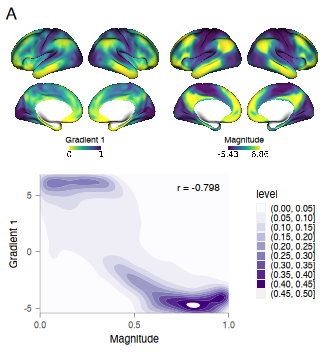

In [57]:
options(repr.plot.width = 70/25.4, repr.plot.height = 75/25.4)

scl=0.6
f3.left.base = plot_grid(NULL, f3.point, nrow=2, rel_heights=c(3.5,4), labels=c('A',''),label_size = 10, label_fontface='plain')
f3.left = ggdraw(f3.left.base) +
            draw_image(img.magni.lat, x = -.05, y = 0.7, scale = scl, halign=0, valign=0) +
            draw_image(img.magni.med, x = -.05, y = 0.54, scale = scl, halign=0, valign=0) +
            draw_image(img.grads.lat, x = .43, y = 0.7, scale = scl, halign=0, valign=0) +
            draw_image(img.grads.med, x = .43, y = 0.54, scale = scl, halign=0, valign=0) +
            annotate('text', x=0.258, y=0.605, label='Gradient 1', size=1.7) +
            annotate('text', x=0.738, y=0.605, label='Magnitude', size=1.7) +
            annotate('text', x=0.6, y=0.47, label="r = -0.798", size=2, fontface='italic')

ggdraw(f3.left)

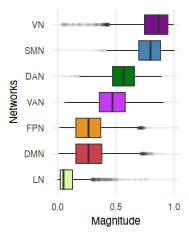

In [59]:
options(repr.plot.width = 40/25.4, repr.plot.height = 50/25.4)

f3.box = ggplot(df.data[df.data$Networks!='NA',], aes(x=Magnitude, y=Networks)) +
            geom_boxplot(outlier.size = 0.1, outlier.alpha = 0.01, size=0.2, aes(fill=Networks)) +
            scale_x_continuous(breaks=c(0, 0.5,1)) +
            scale_y_discrete(limits=rev) +
            scale_fill_manual(values=c('#781286','#4682B4','#00760E','#C43AFA','#E69422','#CD3E4E','#DCF8A4')) +
            theme_minimal() +
            theme(legend.position='none',
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_line(linewidth=0.3),
                    axis.title = element_text(size=6),
                    axis.text = element_text(size=5),
                    text = element_text(family='Helvetica'))


print(f3.box)

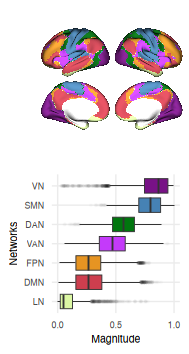

In [60]:
options(repr.plot.width = 40/25.4, repr.plot.height = 75/25.4)

f3.right.base = plot_grid(NULL, f3.box, nrow=2, rel_heights=c(3.5,4)) 
f3.right = ggdraw(f3.right.base) +
                draw_image(img.yeo7n.lat, x = 0.08, y = 0.71, scale = 1, halign=0, valign=0) +
                draw_image(img.yeo7n.med, x = 0.08, y = 0.56, scale = 1, halign=0, valign=0) 

ggdraw(f3.right)

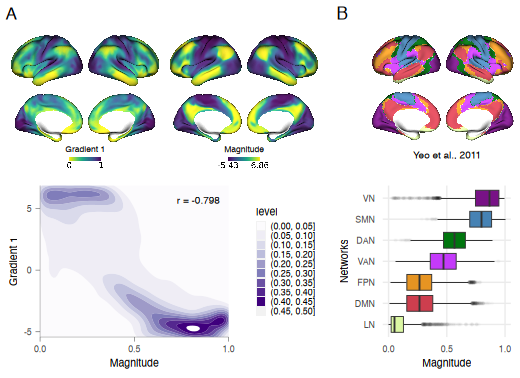

In [61]:
options(repr.plot.width = 110/25.4, repr.plot.height = 80/25.4)

# f3.base = plot_grid(NULL, f3.right, nrow=1, rel_widths=c(1,8))
f3.final = plot_grid(f3.left, f3.right, nrow=1, rel_widths=c(70,40),labels=c('','B'), label_size = 10, label_fontface='plain') +
            # annotate('segment', x=0, xend=1, y=0.61, yend=0.61, linewidth=0.1, color='red') +
            # annotate('segment', x=0, xend=1, y=0.56, yend=0.56, linewidth=0.1, color='red') +
            annotate('text', x=0.86, y=0.59, label='Yeo et al., 2011', size=2, fontface='italic') +
            theme(text = element_text(family='Helvetica'))

ggdraw(f3.final)

In [62]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_03_v6.pdf', width = 11.5,height = 8,units =  "cm", dpi = 600, plot=f3.final)

In [630]:
agg_png("/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/f_03_v6.png", 
           width = 11.5, height = 8, res = 600, units = 'cm', background = 'white')
print(f3.final)
invisible(dev.off())